<h1><center><b>Diabetes Using Tensorflow</b></center></h1>
<center><img src ="https://www.samyzaf.com/ML/pima/pima2.png" width="40%" height="40%"></center>
<p><b>Diabetes is a disease that occurs when your blood glucose, also called blood sugar, is too high. Blood glucose is your main source of energy and comes from the food you eat. Insulin, a hormone made by the pancreas, helps glucose from food get into your cells to be used for energy.</b></p>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rohit_psspl/environments/my_env/lib64/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rohit_psspl/environments/

In [2]:
diabetes = pd.read_csv("/home/rohit_psspl/Desktop/machine learning projects/diabetes using tensor flow/data/diabetes.csv")

In [3]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,6,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,1,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,8,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,1,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


1 - not diabetes
0 - diabetes

In [4]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [5]:
col_to_norm = ['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree']

Here we are normalizing our columns...

In [6]:
diabetes[col_to_norm] = diabetes[col_to_norm].apply(lambda x : (x - x.min())/(x.max()-x.min()))

In [7]:
diabetes.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Class,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,1,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,0,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,1,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,0,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,1,C


In [8]:
diabetes.columns

Index(['Number_pregnant', 'Glucose_concentration', 'Blood_pressure', 'Triceps',
       'Insulin', 'BMI', 'Pedigree', 'Age', 'Class', 'Group'],
      dtype='object')

In [9]:
num_preg =  tf.feature_column.numeric_column('Number_pregnant')
plasma_gluc =  tf.feature_column.numeric_column('Glucose_concentration')
dias_press =  tf.feature_column.numeric_column('Blood_pressure')
tricep =  tf.feature_column.numeric_column('Triceps')
insulin =  tf.feature_column.numeric_column('Insulin')
bmi =  tf.feature_column.numeric_column('BMI')
diabetes_pedigree =  tf.feature_column.numeric_column('Pedigree')
age =  tf.feature_column.numeric_column('Age')

In [10]:
assigned_group = tf.feature_column.categorical_column_with_vocabulary_list('Group',['A','B','C','D'])

In [11]:
# assigned_group = tf.feature_column.categorical_column_with_hash_bucket('Group',hash_bucket_size=10)

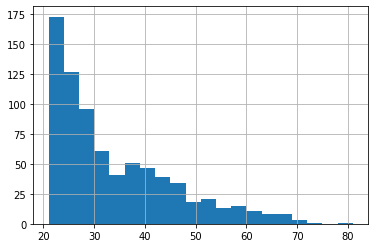

In [12]:
diabetes['Age'].hist(bins=20)

In [13]:
age_bucket = tf.feature_column.bucketized_column(age,boundaries=[20,30,40,50,60,70,80])

In [14]:
feat_cols = [num_preg,plasma_gluc,dias_press,tricep,insulin,bmi,diabetes_pedigree,age_bucket]

In [15]:
# train test split

In [16]:
x_data = diabetes.drop('Class',axis=1)
x_data.head()

,Number_pregnant,Glucose_concentration,Blood_pressure,Triceps,Insulin,BMI,Pedigree,Age,Group
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,50,B
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,31,C
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,32,B
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,21,B
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,33,C


In [17]:
labels = diabetes['Class']
labels.head()

0    1
1    0
2    1
3    0
4    1
Name: Class, dtype: int64

- splitting data into train & test

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(x_data, labels, test_size=0.3, random_state=101)

# Linear Classifier

In [20]:
input_func = tf.estimator.inputs.pandas_input_fn(X_train,y_train,batch_size=10,num_epochs=1000,shuffle=True)

In [21]:
model = tf.estimator.LinearClassifier(feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmplg0k064d', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5771891208>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [22]:
model.train(input_func,steps=1000)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Calling model_fn.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Use tf.cast instead.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
Instructions for updating:
To construct input pipelines, use the `tf.data` module.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmplg0k064d/model.ckpt.
INFO:tensorflow:loss = 6.931472, step = 1
INFO:tensorflow:global_step/sec: 480.137
INFO:tensorflow:loss = 5.3182573, step = 101 (0.212 sec)
INFO:tensorflow:global_step/sec: 581.378
INFO:tensorflow:loss = 6.4798136, step = 201 (0.172 sec)
INFO:tensorflow:global_step/sec: 

In [23]:
eval_input_func = tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [24]:
results = model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-14T11:45:14Z
INFO:tensorflow:Graph was finalized.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from /tmp/tmplg0k064d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-14-11:45:14
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.74025977, accuracy_baseline = 0.64935064, auc = 0.79613173, auc_precision_recall = 0.64461637, average_loss = 0.5277029, global_step = 1000, label/mean = 0.35064936, loss = 5.0791407, precision = 0.65217394, prediction/mean = 0.36765322, recall = 0.5555556
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmplg0k064d/model.ckpt-1000


In [25]:
results

{'accuracy': 0.74025977,
 'accuracy_baseline': 0.64935064,
 'auc': 0.79613173,
 'auc_precision_recall': 0.64461637,
 'average_loss': 0.5277029,
 'label/mean': 0.35064936,
 'loss': 5.0791407,
 'precision': 0.65217394,
 'prediction/mean': 0.36765322,
 'recall': 0.5555556,
 'global_step': 1000}

In [26]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test,batch_size=10,num_epochs=1,shuffle=False)

In [27]:
predictions = model.predict(pred_input_func)

In [28]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplg0k064d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.02410293], dtype=float32),
  'logistic': array([0.50602543], dtype=float32),
  'probabilities': array([0.49397454, 0.50602543], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.55204964], dtype=float32),
  'logistic': array([0.634611], dtype=float32),
  'probabilities': array([0.36538902, 0.634611  ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.43704593], dtype=float32),
  'logistic': array([0.3924451], dtype=float32),
  'probabilities': array([0.6075549, 0.3924451], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.7971618], dtype=float32),
  'logistic': array([0.310633], dtype=float32),
  'probabilities': array([0.689367  , 0.31063294], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8451514], dtype=float32),
  'logistic': arra

In [29]:
y_test

766    1
748    1
42     0
485    1
543    0
      ..
188    1
8      1
645    0
381    0
314    1
Name: Class, Length: 231, dtype: int64

# DNN (Dense Neural Network)

<b>What is a dense neural network? The name suggests that layers are fully connected (dense) by the neurons in a network layer. Each neuron in a layer receives an input from all the neurons present in the previous layer—thus, they're densely connected.</b>

<center><img src ="https://encrypted-tbn0.gstatic.com/images?q=tbn%3AANd9GcTbkcaYQqwTW0DdrbA4-Rwb-DC5_COw8AtJe90qgJ7ZtCp6iJam"></center>

In [30]:
dnn_model = tf.estimator.DNNClassifier(hidden_units=[10,10,10],feature_columns=feat_cols,n_classes=2)

INFO:tensorflow:Using default config.
INFO:tensorflow:Using config: {'_model_dir': '/tmp/tmpvptv5u1t', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': None, '_save_checkpoints_secs': 600, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f5770b03be0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [31]:
dnn_model.train(input_fn=input_func, steps=1000)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Create CheckpointSaverHook.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Saving checkpoints for 0 into /tmp/tmpvptv5u1t/model.ckpt.
INFO:tensorflow:loss = 6.9303102, step = 1
INFO:tensorflow:global_step/sec: 318.916
INFO:tensorflow:loss = 4.0603333, step = 101 (0.313 sec)
INFO:tensorflow:global_step/sec: 537.646
INFO:tensorflow:loss = 5.328895, step = 201 (0.193 sec)
INFO:tensorflow:global_step/sec: 447.99
INFO:tensorflow:loss = 9.390335, step = 301 (0.217 sec)
INFO:tensorflow:global_step/sec: 632.579
INFO:tensorflow:loss = 5.645565, step = 401 (0.160 sec)
INFO:tensorflow:global_step/sec: 642.202
INFO:tensorflow:loss = 3.8963227, step = 501 (0.155 sec)
INFO:tensorflow:global_step/sec: 427.391
INFO:tensorflow:loss = 5.471199, step = 601 (0.236 sec)
INFO:tensorflow:global_step/sec: 567.911
INFO:tensorflow:loss 

In [32]:
eval_input_func =tf.estimator.inputs.pandas_input_fn(X_test,y_test,batch_size=10,num_epochs=1,shuffle=False)

In [33]:
results = dnn_model.evaluate(eval_input_func)

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Starting evaluation at 2020-01-14T11:45:22Z
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmpvptv5u1t/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.
INFO:tensorflow:Finished evaluation at 2020-01-14-11:45:22
INFO:tensorflow:Saving dict for global step 1000: accuracy = 0.76623374, accuracy_baseline = 0.64935064, auc = 0.82711935, auc_precision_recall = 0.68003637, average_loss = 0.4847349, global_step = 1000, label/mean = 0.35064936, loss = 4.6655736, precision = 0.6708861, prediction/mean = 0.35537788, recall = 0.654321
INFO:tensorflow:Saving 'checkpoint_path' summary for global step 1000: /tmp/tmpvptv5u1t/model.ckpt-1000


In [34]:
results

{'accuracy': 0.76623374,
 'accuracy_baseline': 0.64935064,
 'auc': 0.82711935,
 'auc_precision_recall': 0.68003637,
 'average_loss': 0.4847349,
 'label/mean': 0.35064936,
 'loss': 4.6655736,
 'precision': 0.6708861,
 'prediction/mean': 0.35537788,
 'recall': 0.654321,
 'global_step': 1000}

In [35]:
pred_input_func = tf.estimator.inputs.pandas_input_fn(X_test,batch_size=10,num_epochs=1,shuffle=False)

In [36]:
predictions = model.predict(pred_input_func)

In [37]:
my_pred = list(predictions)
my_pred

INFO:tensorflow:Calling model_fn.
INFO:tensorflow:Done calling model_fn.
INFO:tensorflow:Graph was finalized.
INFO:tensorflow:Restoring parameters from /tmp/tmplg0k064d/model.ckpt-1000
INFO:tensorflow:Running local_init_op.
INFO:tensorflow:Done running local_init_op.


[{'logits': array([0.02410293], dtype=float32),
  'logistic': array([0.50602543], dtype=float32),
  'probabilities': array([0.49397454, 0.50602543], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([0.55204964], dtype=float32),
  'logistic': array([0.634611], dtype=float32),
  'probabilities': array([0.36538902, 0.634611  ], dtype=float32),
  'class_ids': array([1]),
  'classes': array([b'1'], dtype=object)},
 {'logits': array([-0.43704593], dtype=float32),
  'logistic': array([0.3924451], dtype=float32),
  'probabilities': array([0.6075549, 0.3924451], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-0.7971618], dtype=float32),
  'logistic': array([0.310633], dtype=float32),
  'probabilities': array([0.689367  , 0.31063294], dtype=float32),
  'class_ids': array([0]),
  'classes': array([b'0'], dtype=object)},
 {'logits': array([-1.8451514], dtype=float32),
  'logistic': arra